In [1]:
%matplotlib inline
from dotenv import find_dotenv
from glob import glob
from os.path import basename
from os.path import dirname
from os.path import join
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Root directory of repo
project_dir = dirname(find_dotenv())

# Use custom matplotlib style
plt.style.use(join(project_dir, 'big-darkgrid.mplstyle'))

# Walmart Data Expoloratory Analysis

The first thing I'll do is explore the data provided for this challenge. Here are the files available to analyze:

In [2]:
files = sorted(glob('{}/data/raw/*.csv'.format(project_dir)))
for f in files:
    print(basename(f))

features.csv
sampleSubmission.csv
stores.csv
test.csv
train.csv


Let's take a peak at each file:

In [3]:
for f in files:
    print(basename(f))
    display(pd.read_csv(f).head())

features.csv


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


sampleSubmission.csv


,Id,Weekly_Sales
0,1_1_2012-11-02,0
1,1_1_2012-11-09,0
2,1_1_2012-11-16,0
3,1_1_2012-11-23,0
4,1_1_2012-11-30,0


stores.csv


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


test.csv


,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


train.csv


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


The most important of these is `train.csv` and `test.csv`. 

In [4]:
train_csv = join(project_dir, 'data/raw/train.csv')
train_df = pd.read_csv(train_csv, parse_dates=[2])
train_df['Store_Dept'] = train_df['Store'].map(str) + "_" + train_df['Dept'].map(str)
train_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Store_Dept
0,1,1,2010-02-05,24924.50,False,1_1
1,1,1,2010-02-12,46039.49,True,1_1
2,1,1,2010-02-19,41595.55,False,1_1
3,1,1,2010-02-26,19403.54,False,1_1
4,1,1,2010-03-05,21827.90,False,1_1


In [5]:
print("# of stores:                  ", train_df['Store'].nunique())
print("# of departments:             ", train_df['Dept'].nunique())
print("# of store/department combos: ", train_df['Store_Dept'].nunique())
print("# of lines in file:           ", len(train_df))

# of stores:                   45
# of departments:              81
# of store/department combos:  3331
# of lines in file:            421570


Let's look at the data for a subsample of the store/department combinations (so the plot generates faster)

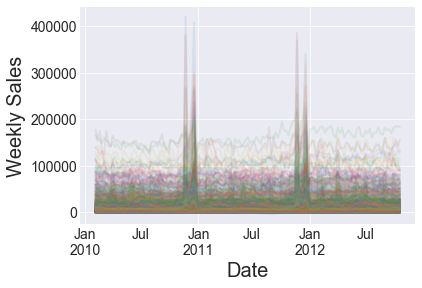

In [6]:
fig, ax = plt.subplots()
store_depts_to_sample = np.random.choice(train_df['Store_Dept'].unique(), size=1000)
train_df_sub = train_df[train_df['Store_Dept'].isin(store_depts_to_sample)]
for store_dept, group in train_df_sub.groupby('Store_Dept'):
    group = group.set_index('Date')
    ax = group['Weekly_Sales'].plot(ax=ax, legend=False, alpha=0.1)
ax.set_ylabel('Weekly Sales')
plt.show()

We see that there are yearly spikes around Christmas, and weekly spikes on weekends.

In [7]:
week_by_dept = pd.pivot_table(train_df, index='Date', columns='Store_Dept', values='Weekly_Sales')
n_empty = week_by_dept.isnull().sum().sum()
n_rows = week_by_dept.shape[0]
n_cols = week_by_dept.shape[1]
print("Pivot table rows:         {}".format(n_rows))
print("Pivot table columns:      {}".format(n_cols))
print("Pivot table empty values: {}".format(n_empty))
print("Pivot table density:      {:.3f}".format(1 - n_empty / n_rows / n_cols))
display(week_by_dept.head())
display(week_by_dept.tail())

Pivot table rows:         143
Pivot table columns:      3331
Pivot table empty values: 54763
Pivot table density:      0.885


Store_Dept,10_1,10_10,10_11,10_12,10_13,10_14,10_16,10_17,10_18,10_19,...,9_9,9_90,9_91,9_92,9_93,9_94,9_95,9_96,9_97,9_98
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,40212.84,48027.87,36705.57,10365.86,74020.63,55033.94,25694.43,36872.18,8912.27,4046.34,...,7245.32,2335.92,292.64,11620.09,NaN,NaN,23292.10,2438.08,668.48,NaN
2010-02-12,67699.32,50595.72,31052.34,9375.25,69145.42,51167.46,24555.89,34782.91,28176.35,3602.73,...,6556.94,2486.18,544.74,11080.50,NaN,982.50,22317.38,2304.09,766.93,NaN
2010-02-19,49748.33,51199.72,33224.65,11032.90,68060.96,49011.24,33321.92,34512.54,16244.14,3617.85,...,7301.19,2452.70,424.26,10233.49,NaN,2163.75,20694.32,1944.11,607.02,NaN
2010-02-26,33601.22,50028.83,29268.91,11058.90,71517.99,49829.71,27773.67,31175.51,916.25,4207.51,...,7814.18,2386.49,470.43,10786.42,NaN,NaN,21780.08,2423.55,580.74,NaN
2010-03-05,36572.44,49892.15,31934.99,11033.07,70279.43,46865.98,35227.56,33143.03,1426.47,3623.52,...,10540.89,2369.01,679.47,11176.21,NaN,NaN,22187.57,2591.28,371.05,NaN


Store_Dept,10_1,10_10,10_11,10_12,10_13,10_14,10_16,10_17,10_18,10_19,...,9_9,9_90,9_91,9_92,9_93,9_94,9_95,9_96,9_97,9_98
Date,,,,,,,,,,,,,,,,,,,,,
2012-09-28,31477.50,47821.03,23483.55,8628.64,56960.17,30545.42,17398.02,22918.62,11069.68,2930.77,...,16044.45,3156.76,998.95,18333.69,NaN,NaN,33119.87,3763.21,NaN,NaN
2012-10-05,36323.95,46511.89,26447.16,9423.35,64940.04,34453.61,16204.14,25257.58,16151.92,2968.35,...,17044.07,2954.65,889.74,20612.82,NaN,158.98,35189.41,4306.43,NaN,NaN
2012-10-12,40626.47,48684.03,25425.08,9051.76,61065.21,33971.87,12939.16,24494.83,19251.31,3440.85,...,13830.42,3151.12,698.84,20285.74,NaN,3.88,32072.80,3675.99,NaN,NaN
2012-10-19,44224.36,46947.21,25507.61,8245.89,58976.21,38299.34,15007.93,25287.66,22814.92,2955.10,...,12813.42,3126.61,923.60,19304.95,NaN,23.28,34031.01,3540.05,NaN,NaN
2012-10-26,58409.83,43637.06,25448.11,9043.49,61010.32,31883.89,11397.55,24781.75,27426.84,3271.02,...,14034.40,3096.77,914.84,18310.28,NaN,233.02,32382.05,4752.25,NaN,NaN


There are quite a few empty values, and we'll have to be careful about how to fill those in. Let's look at some stores with empty values:

Store_Dept
10_77    142
36_71    142
14_43    142
17_99    142
30_19    142
dtype: int64

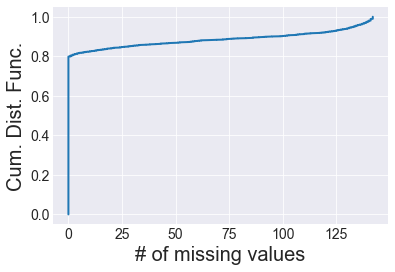

In [8]:
n_empty_by_dept = week_by_dept.isnull().sum().sort_values()
display(n_empty_by_dept.tail())
plt.plot(n_empty_by_dept.values, np.linspace(0, 1, len(n_empty_by_dept)))
plt.xlabel("# of missing values")
plt.ylabel("Cum. Dist. Func.")
plt.show()

80% of stores have no missing values, and the other 20% range from missing a couple to missing all but 1 value. So it's definitely not guaranteed that any given missing value will have a corresponding date with a non-empty value.

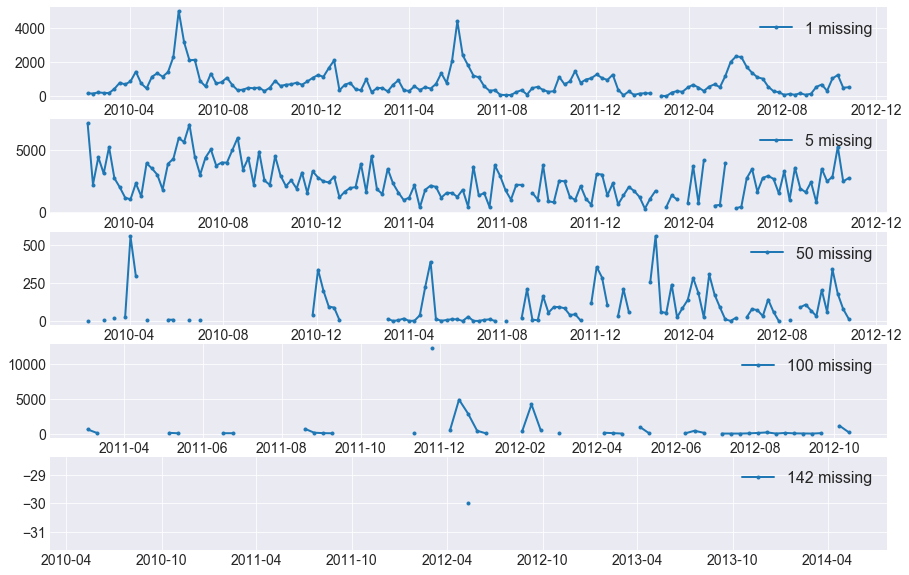

In [9]:
n_list = [1, 5, 50, 100, 142]
fig, axes = plt.subplots(len(n_list), 1, figsize=(15,10))
for n, ax in zip(n_list, axes):
    store_dept = n_empty_by_dept[n_empty_by_dept == n].index[0]
    ax.plot(week_by_dept[store_dept].index, week_by_dept[store_dept], '.-', label='{} missing'.format(n))
    ax.legend(loc='upper right')
plt.show()

It's not clear whether missing means no sales or whether there's any other info we can get from that. Let's see what filling in the values with interpolations looks like:

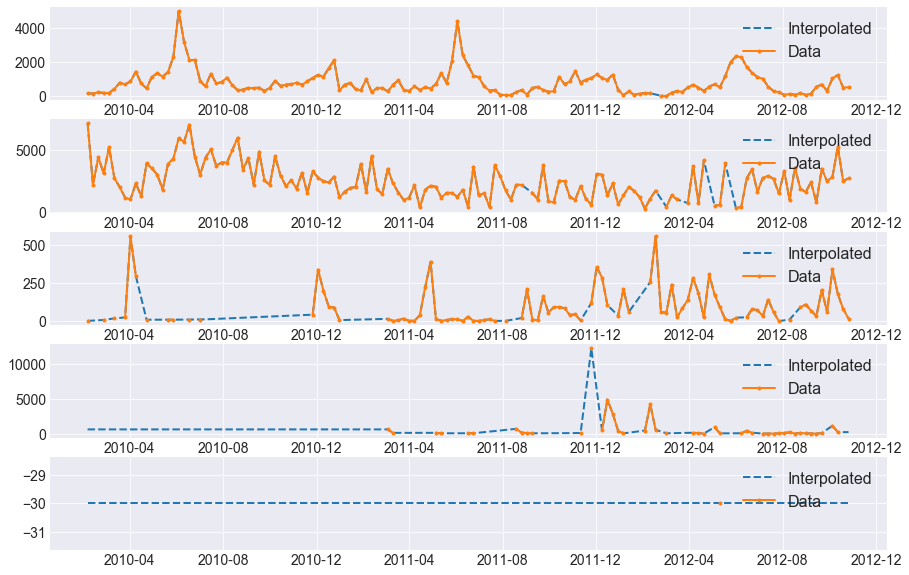

In [10]:
n_list = [1, 5, 50, 100, 142]
fig, axes = plt.subplots(len(n_list), 1, figsize=(15,10))
for n, ax in zip(n_list, axes):
    store_dept = n_empty_by_dept[n_empty_by_dept == n].index[0]
    ax.plot(week_by_dept[store_dept].index,
            week_by_dept[store_dept].interpolate(limit_direction='both'),
            '--', label='Interpolated'.format(n))
    ax.plot(week_by_dept[store_dept].index,
            week_by_dept[store_dept],
            '.-', label='Data'.format(n))
    ax.legend(loc='upper right')
plt.show()